In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [31]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [32]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [33]:
x_train = train.drop('label', axis=1).values
x_test = test.drop('label', axis=1).values

In [34]:
y_train = train['label'].values
y_test = test['label'].values

In [47]:
x_train.reshape(-1,32,32,3)
x_test.reshape(-1,32,32,3)
x_train = x_train.astype('float32')/255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [48]:
# y_train = y_train.reshape(-1)
# y_test = y_test.reshape(-1)

In [49]:
# y_train = tf.keras.utils.to_categorical(y_train, 2)
# y_test = tf.keras.utils.to_ctegorical(y_test, 2)

In [50]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(20, activation='softmax')  # Assuming there are 20 classes
])


In [51]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [52]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=50)


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2452 - loss: 2.1193 - val_accuracy: 0.3483 - val_loss: 170.0428
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3586 - loss: 1.8067 - val_accuracy: 0.3395 - val_loss: 198.2864
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3934 - loss: 1.7196 - val_accuracy: 0.4002 - val_loss: 171.5655
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4133 - loss: 1.6616 - val_accuracy: 0.3967 - val_loss: 187.4726
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4255 - loss: 1.6162 - val_accuracy: 0.4213 - val_loss: 170.1823


In [53]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4250 - loss: 168.7107


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


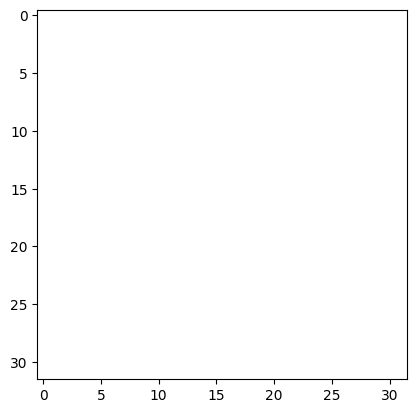

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predicted value:  9


In [59]:
n=20
plt.imshow(x_test[n])
plt.show()
predicted_values = model.predict(x_test)
print("predicted value: ", np.argmax(predicted_values[n]))

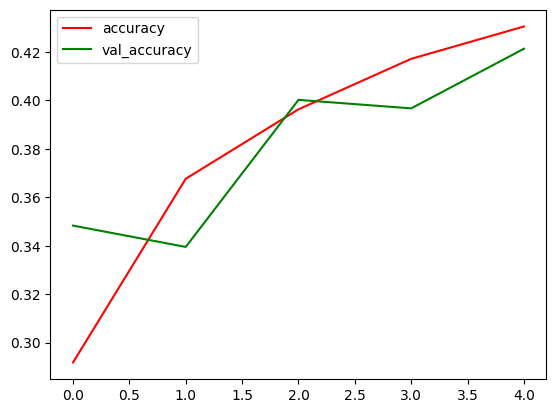

In [60]:
plt.plot(history.history['accuracy'], label='accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='green')
plt.legend()